# **MNIST Digit Classification with a Convolutional Neural Network (CNN) Using TensorFlow and Keras**
*By Carlos Santiago Bañón*

* **Year:** 2020
* **Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras
* **Areas:** Computer Vision, Deep Learning, Classification
* **Keywords:** `classification`, `cnn`, `computer-vision`, `convolution`, `convolutional-neural-network`, `deep-learning`, `fully-connected`, `max-pooling`, `mnist`, `multi-class-classification`, `neural-network`, `2d-convolution`, `2d-max-pooling`
* **Description:** This notebook presents an MNIST digit classifier built with a convolutional neural network (CNN) using TensorFlow and Keras.

## 1. Import Statements

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [2]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [4]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [5]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [6]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


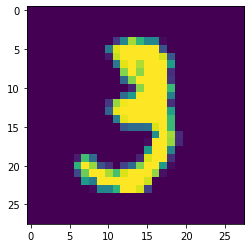

In [7]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [8]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [9]:
# Define the convolutional neural network.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 10 epochs, using a batch size of 128.

In [12]:
# Define the parameters.
num_epochs = 10
batch_size = 128

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 46s 96ms/step - loss: 0.5732 - accuracy: 0.8272 - val_loss: 0.0688 - val_accuracy: 0.9779
Epoch 2/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0406 - val_accuracy: 0.9867
Epoch 3/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0337 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0311 - val_accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 44s 95ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0281 - val_accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0275 - val_accuracy:

### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.0252 - accuracy: 0.9921
Test Accuracy: 0.9921000003814697
Test Loss: 0.025236790999770164


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [14]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [15]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

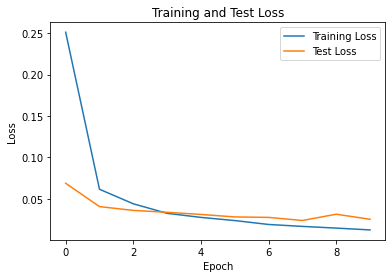

In [16]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [17]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

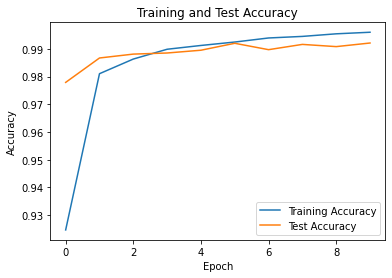

In [18]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [19]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

Finally, we can show a random test image with its corresponding prediction.

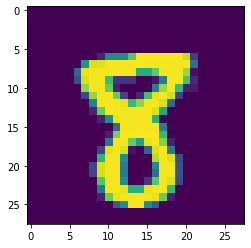

In [20]:
# Choose an index.
index = 128

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [21]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 8
